# Life expectancies

In [1]:
import pandas as pd

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

Differences between Men and Women in Mortality and the Health Dimensions of the Morbidity Process

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6345642/

In [3]:
os.chdir(os.environ['HOME'] + '/DUMP')

# Data sources

We are interested in seeing what we can get 
out from the demographical data we can get 
from the **INSEE**

base_url = 'https://www.insee.fr/fr/statistiques/1913143'


---

There are 4 files available f you look hard enough

- pyramide-des-ages-2020.xls
- pyramide-des-ages-2019.xls
- pyramide-des-ages-2017.xls   
- pyramide-des-ages-2018.xls


---

I actually downloaded them by hand but you can do a get()

In [319]:
ls *xls

pop-totale-france-metro.xls  pyramide-des-ages-2019.xls
pyramide-des-ages-2017.xls   pyramide-des-ages-2020.xls
pyramide-des-ages-2018.xls


## I really like roll()

In [320]:
np.roll(np.arange(2017,2021),shift=1)

array([2020, 2017, 2018, 2019])

## We'll stick them in an array 

it's convenient because we are going to do a few diffs

There are 5 columns.


In [321]:
dfs = [ pd.read_excel('pyramide-des-ages-%d.xls'%x, skiprows=5 )
                                             for x in np.arange(2017,2021)]

dfs[0][:5]

,Année de naissance,Âge révolu,Nombre d'hommes,Nombre de femmes,Ensemble
0,2016,0,377237,361116,738353
1,2015,1,387510,370874,758384
2,2014,2,396795,384234,781029
3,2013,3,403205,385980,789185
4,2012,4,415088,395182,810270


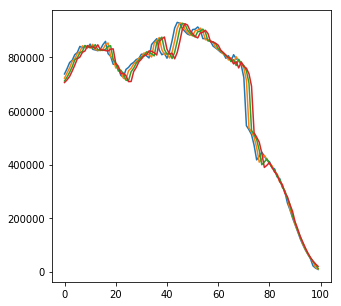

In [361]:
fig, ax = plt.subplots()
fig.set_size_inches(5,5)

for df in dfs:
    ax.plot(df.iloc[:-2, -1])


# Demographic features 20th century France

You can see that the right hand side of our graph
mirrors the features of the population trend,
in particular the **post war baby boom**.



![pop](https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/Population2Centuries.jpg/600px-Population2Centuries.jpg)

## The first column  is a fecker

the last entries are text :(

In [362]:
dfs[0].iloc[-3:,0][-10:]

99              1917
100    1916 ou avant
101              NaN
Name: Année de naissance, dtype: object

## I use np.roll a lot

but you can use zip

In [322]:
k = col = 0
U = np.roll(dfs[k].iloc[:-2,col],shift=1) -  dfs[k+1].iloc[:-2,col] 
U[:5]

0    -100
1       0
2       0
3       0
4       0
Name: Année de naissance, dtype: object

## I should use a decorator to set up the graphs ?

if fig is local to the decorator and global 
to the wrapped code then sure..

In [323]:
def all_plot(col=-1, 
             label='number of deaths both sexes',
             start=60):
    fig, ax = plt.subplots()
    fig.set_size_inches(8,8)

    for k in range(3):   
        U =np.roll(dfs[k].iloc[:,col],shift=1) -  dfs[k+1].iloc[:,col] 
        ax.plot(U[start:-2] ,label='data%d'%k)


    plt.ylabel(label)
    leg = ax.legend()
    
  

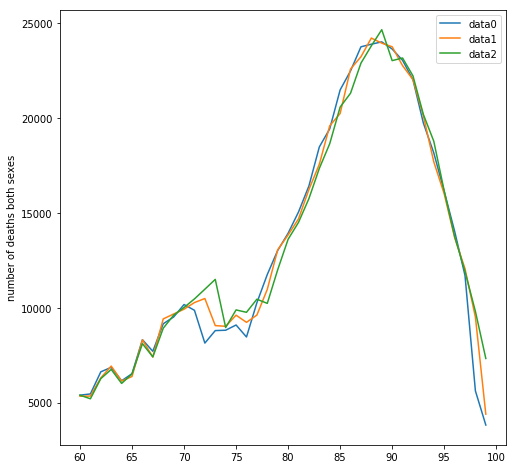

In [324]:
all_plot()

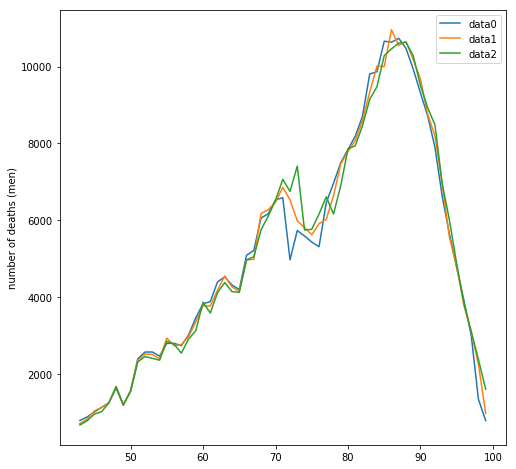

In [69]:
all_plot(col=-3, 
        label='number of deaths (men)',
        start=43)


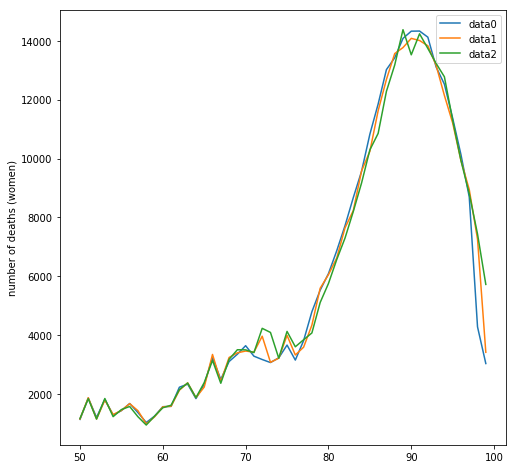

In [66]:
all_plot(col=-2, 
        label='number of deaths (women)',
        start=50)

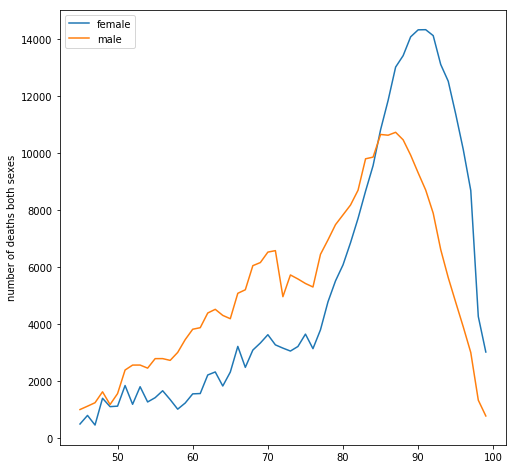

In [77]:
def yr_plot(k=0, 
            start=60):
    fig, ax = plt.subplots()
    fig.set_size_inches(8,8)
   
    U = np.roll(dfs[k].iloc[:,-2],shift=1) -  dfs[k+1].iloc[:,-2] 
    ax.plot(U[start:-2] ,label='female')
    U = np.roll(dfs[k].iloc[:,-3],shift=1) -  dfs[k+1].iloc[:,-3] 
    ax.plot(U[start:-2] ,label='male')


    plt.ylabel('number of deaths both sexes')
    leg = ax.legend()

yr_plot(k=0, start=45)

203.73076923076925 0.9456158123063966 1.063422106972916e-06
876.9384615384615 0.9970122806008709 1.0203489964861413e-14


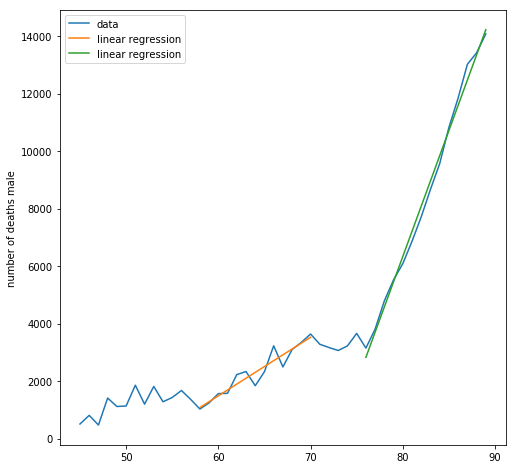

In [133]:
k = 0
col = -2

fig, ax = plt.subplots()
fig.set_size_inches(8,8)

U = np.roll(dfs[k].iloc[:,col],shift=1) -  dfs[k+1].iloc[:,col] 

ax.plot(U[45:90] ,label='data')

for T in [np.arange(58,71), np.arange(76,90)]:
    
    vv = stats.linregress(T, U[T])
    yy = T*vv.slope + vv.intercept
    ax.plot(T,np.interp(T,T,yy),label='linear regression')
    print(vv.slope, vv.rvalue, vv.pvalue)



plt.ylabel('number of deaths male')
leg = ax.legend()


## Conditional probabilities

my code is a bit obscure 
but I've seen worse in TensorFlow ;)

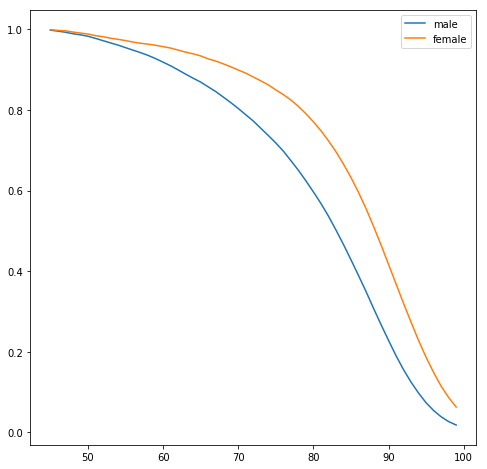

In [160]:
k = 0 
start = 45

fig, ax = plt.subplots()
fig.set_size_inches(8,8)
   
for col,l in zip([2,3],['male','female']):
    U = dfs[k+1].iloc[:,col] /np.roll(dfs[k].iloc[:,col],shift=1)   
    V = np.cumsum(np.log(U[start:-2]))
    ax.plot(np.exp(V) ,label=l)

leg = ax.legend()

## Conditional life expectancy

In [358]:
L = []

for start in np.arange(50,90):
    k = 2   # this is the pair of years
    col = 2
    U = dfs[k+1].iloc[:,col] /np.roll(dfs[k].iloc[:,col],shift=1)  

    T = np.arange(start,100)
    V = np.exp(np.cumsum(np.log(U[T])))
    vv = np.roll(V, shift=1)
    vv[0] = 1

    yy = np.dot(vv - V, (T+.5)) + 100 * ( 1 - sum(vv - V) ) # esperance de vie
    #print(start, yy)
    L.append(yy)
    
L.reverse()

# Checking


so I found some site that has a life expectancy calculator
based on different models


http://mon-convertisseur.fr/estimation-esperance-vie-residuelle.php


Scaping it is very very very easy.

I'm not going to use BS to parse as I only want two numbers

In [327]:
import requests
import re
pp = re.compile('<strong>(\d.*?)\s',re.DOTALL)
pp.findall(r.text)

url = 'http://mon-convertisseur.fr/estimation-esperance-vie-residuelle.php'

db = ["WHO2015", "UN2015", "CIA2012", "GBD2010", "OECD2013"]
dbs ={x : [] for x in db}

payload = {'SEXE' : 'H',
          'COUNTRYCODE' : 'FR',
          'DD1' : '01',
          'MM1' : '01',
          'YYYY1' : '1966',
          'DD2' : '11',
          'MM2' : '05',
          'YYYY2' : '2020',
          'CODTAB' : 'CIA2012',
          'btnSbmt1' :  'Estimer espérance de vie'}


for x in dbs.keys():
    print('Fetching ', x)
    payload['CODTAB'] = x
    for k in np.arange(1930,1975):
        payload['YYYY1'] = str(k)
        r = requests.get(url, params=payload)
        ss = [k]
        ss.extend(pp.findall(r.text))
        dbs[x].append(ss)

print('DONE')

Fetching  WHO2015
Fetching  UN2015
Fetching  CIA2012
Fetching  GBD2010
Fetching  OECD2013
DONE


In [328]:
import pickle
pickle.dump(dbs,open('LIFE_EXPECTANCY.pkl','wb'))

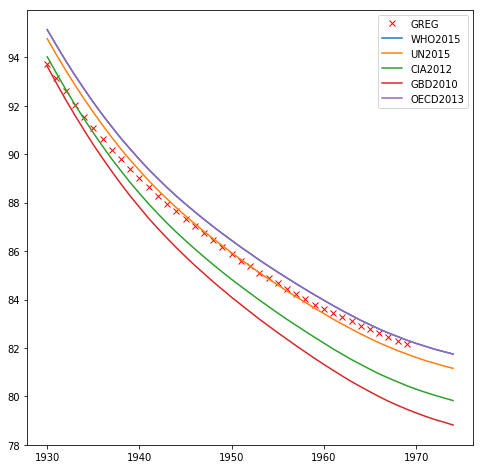

In [357]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

ax.plot(np.arange(1930,1970),L,'rx',label= 'GREG')
for kk in dbs.keys():
    df = pd.DataFrame(dbs[kk], 
                   columns =['YY', 'EY','EL']) 

    df['EY'] = df['EY'].values.astype(float)
    df['EL'] = df['EL'].values.astype(float)
    ax.plot(np.arange(1930,1975),df['EL'], label=kk)
    
leg = ax.legend()

In [363]:
import requests

url = 'https://www.insee.fr/fr/outil-interactif/3312958/data/datafefm.js'
r = requests.get(url)
r.content


In [387]:
LL = r.text.split(';')
tt = LL[0].replace('//Hommes','')
tt = tt.replace('// femmes','')
tt = tt.replace('var','').strip()
with open('data.py','w') as fp:
    fp.write(tt)

In [389]:
import data

In [421]:
table = data.past_data_fm
M, F = table

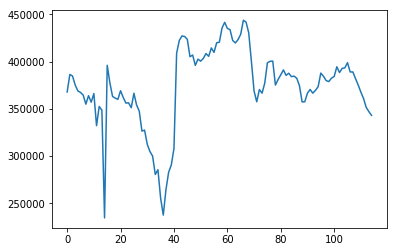

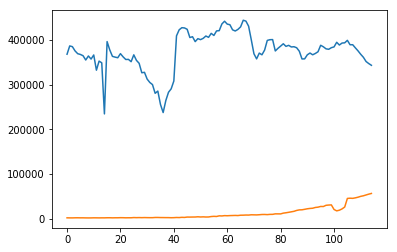

In [426]:
plt.plot(M[0])
plt.plot(M[90])

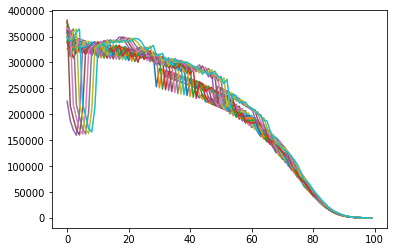

In [437]:
UU = list(zip(* F))
for k in range(0,20):
    plt.plot(UU[k][:100])

In [372]:
for x in LL:
    print(x[:100])

var past_data_fm = [
[//Hommes
[367744,386291,384638,375150,368923,367241,364405,354832,363814,356

var past_toth_fm=
[18938274,18973745,19016639,19054682,19083824,19096857,19120592,19131433,191774

var past_totf_fm=
[19547651,19590232,19639872,19682790,19715822,19738702,19772591,19793725,198468

var past_tot_fm=
[38485925,38563977,38656511,38737472,38799646,38835559,38893183,38925158,3902432

var past_data_fe = [
[//Hommes
[399548,397292,389567,371874,371989,380925,384793,381204,383957,3

var past_toth_fe=
[28374772,28511063,28641343,28735278,28824323,28912291,29003262,29095187,291964

var past_totf_fe=
[29905363,30060174,30210659,30334799,30456254,30575122,30687915,30804160,309262

var past_tot_fe=
[58280135,58571237,58852002,59070077,59280577,59487413,59691177,59899347,6012266




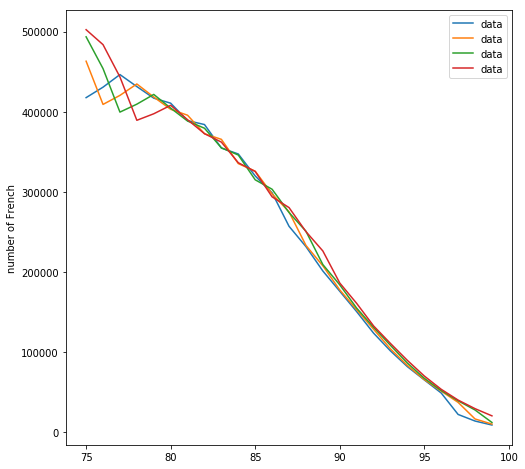

In [256]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

for df in dfs:   
    X = df.iloc[75:100,-1]
    ax.plot(X,label='data')


plt.ylabel('number of French')
leg = ax.legend()
    

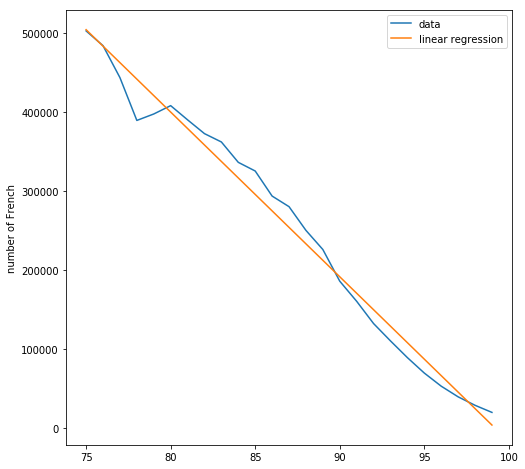

In [31]:
from scipy import stats

df = dfs[-1]
X = df.iloc[75:100,-1]

fig, ax = plt.subplots()
fig.set_size_inches(8,8)

ax.plot(X,label='data')
T = np.arange(75,100)

vv = stats.linregress(T, X)

xx = np.array([0,100])
yy = xx*vv.slope + vv.intercept

ax.plot(T,np.interp(T,xx,yy),label='linear regression')
plt.ylabel('number of French')
leg = ax.legend()

In [20]:
vv.slope # should be near the total deaths ~600 000

-20750.883846153847

<script id="gatsby-script-loader">/*<![CDATA[*/window.pagePath="/graphs-and-maps";/*]]>*/</script>

http://theautomatic.net/2019/01/19/scraping-data-from-javascript-webpage-python/